In [50]:
seed = 42

# Import libraries
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split

import random
random.seed(seed)
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import cv2
#from google.colab.patches import cv2_imshow
import numpy as np

from PIL import Image

from skimage.transform import resize

from tensorflow.keras.initializers import he_normal, glorot_uniform, glorot_normal
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import to_categorical

import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

devices = tf.config.experimental.list_physical_devices()
print("Dispositivi visibili a TensorFlow:")
for device in devices:
    print(device)
from tensorflow.keras.layers import GlobalAveragePooling2D,BatchNormalization
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Reshape, Flatten, Dropout, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.initializers import HeNormal, GlorotUniform, Zeros
from tensorflow.keras.losses import MeanSquaredError
import numpy as np

from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.losses import BinaryCrossentropy


import h5py
import os
import numpy as np
import numpy as np
from tensorflow.keras.models import load_model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.stats import ttest_ind

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

import h5py
import os
import numpy as np
import numpy as np
from tensorflow.keras.models import load_model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
#import pymrmr
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

import os
rd=0
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Dispositivi visibili a TensorFlow:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [77]:

# Carica il file CSV
file_path = "/Users/alessiamenozzi/Desktop/ThesisPlaques/data_rad_clin_DEF.csv"
#file_path = "C:\\Users\\bsbar\\Desktop\\Tesi\\ThesisPlaques\\data_rad_clin_DEF.csv"
data = pd.read_csv(file_path)

# Lista degli ID da escludere
ids_to_exclude = ["patient_TC_19", "patient_TC_40", "patient_TC_88", "patient_TC_150", "patient_TC_193"]

# Filtra il DataFrame per escludere le righe con gli ID specificati
filtered_data = data[~data['IDs_new'].isin(ids_to_exclude)]

# Estrae i valori dalla colonna 'label' del DataFrame filtrato
labels_column = filtered_data['label']

# Converte i valori della colonna 'label' in numeri interi
labels = labels_column.astype(int).tolist()

Y_train=np.array(labels)

df = pd.read_csv('/Users/alessiamenozzi/Desktop/tabella_risultati.csv')
print(df.columns)
# Supponiamo che i numeri dei pazienti siano nella prima colonna
df.columns = ['numero_paziente'] + [f'feature_{i}' for i in range(1, 1537)]

# Ordina i dati in base ai numeri dei pazienti
df_sorted = df.sort_values(by='numero_paziente')

# Estrai le feature in un array
features_array = df_sorted.iloc[:, 1:].values
X_train = np.array(features_array)
print(X_train.shape)

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '1526', '1527', '1528', '1529', '1530', '1531', '1532', '1533', '1534',
       '1535'],
      dtype='object', length=1537)
(124, 1536)


(74, 1503)
(50, 1503)
(74, 1503)
(50, 1503)
Train Accuracy: 0.8648648648648649
Test Accuracy: 0.52
Train Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88        39
           1       0.90      0.80      0.85        35

    accuracy                           0.86        74
   macro avg       0.87      0.86      0.86        74
weighted avg       0.87      0.86      0.86        74

Test Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        32
           1       0.38      0.56      0.45        18

    accuracy                           0.52        50
   macro avg       0.53      0.53      0.51        50
weighted avg       0.57      0.52      0.53        50

Train Confusion Matrix:


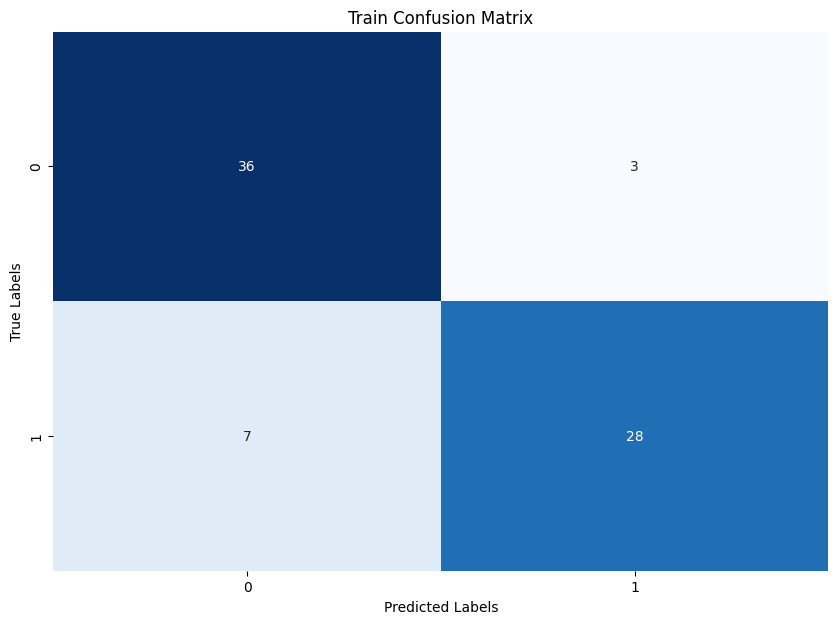

Validation Confusion Matrix:
Test Confusion Matrix:


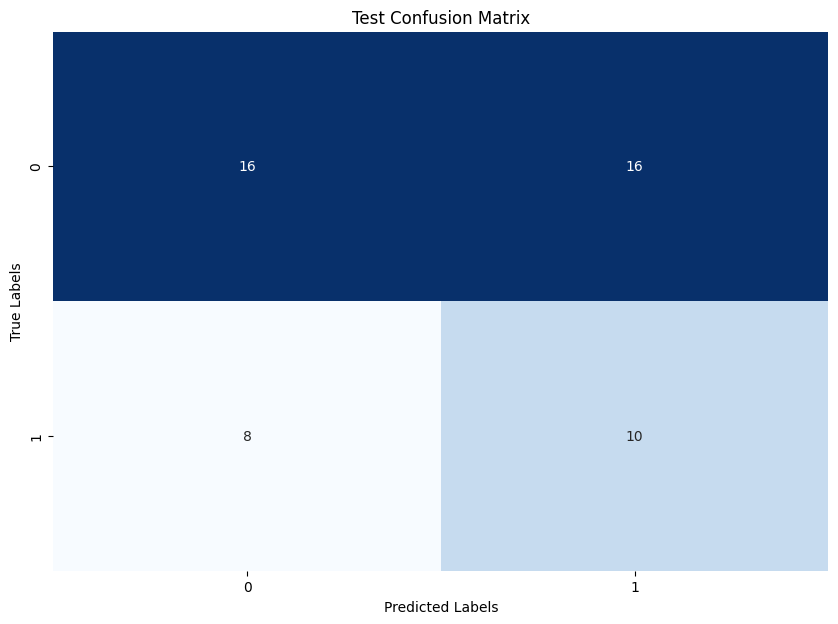

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from scipy.stats import pearsonr

# Esempio di dati
# X_train e y_train devono essere forniti
# X_train: (124, 1536), y_train: (124,)

# Calcolo della correlazione tra le feature
def compute_correlation(X, threshold=0.85):
    corr_matrix = np.corrcoef(X, rowvar=False)
    upper_triangle = np.triu(corr_matrix, k=1)
    to_drop = [column for column in range(upper_triangle.shape[0]) if any(abs(upper_triangle[column, :]) > threshold)]
    return to_drop

# Rimuovere feature con alta correlazione
def remove_highly_correlated_features(X, threshold=0.85):
    to_drop = compute_correlation(X, threshold)
    X_reduced = np.delete(X, to_drop, axis=1)
    return X_reduced

# Rimuovere feature con p-value elevato
def remove_highly_correlated_features(X, threshold=0.85):
    corr_matrix = np.corrcoef(X, rowvar=False)
    upper_triangle = np.triu(corr_matrix, k=1)
    to_drop = [column for column in range(upper_triangle.shape[0]) if any(abs(upper_triangle[column, :]) > threshold)]
    X_reduced = np.delete(X, to_drop, axis=1)
    return X_reduced, to_drop



y_train, y_test, x_train, X_test= train_test_split(Y_train, X_train, test_size=0.4, shuffle=False, random_state=1)
#y_train, y_val, x_train, X_val= train_test_split(y_train1, X_train1, test_size=0.3, shuffle=True, stratify=y_train1, random_state=1)


X_train_reduced, dropped_features = remove_highly_correlated_features(x_train, 0.85)

# Riduci X_val e X_test usando le feature rimosse
#X_val_reduced = np.delete(X_val, dropped_features, axis=1)
X_test_reduced = np.delete(X_test, dropped_features, axis=1)

print(X_train_reduced.shape)

print(X_test_reduced.shape)
#print(X_val_reduced.shape)



# Rimozione delle feature con p-value elevato
#X_train_reduced, features_to_keep = remove_high_pvalue_features(X_train_reduced, y_train, alpha=0.005)
#print(features_to_keep)
#X_val_reduced = X_val_reduced[:, features_to_keep]
#X_test_reduced = X_test_reduced[:, features_to_keep]


print(X_train_reduced.shape)

print(X_test_reduced.shape)
#print(X_val_reduced.shape)


# Addestramento del modello SVM
model = SVC(kernel='rbf', random_state=42)
#model= MLPClassifier(hidden_layer_sizes=(128,64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive')
model.fit(X_train_reduced, y_train)

# Previsioni
y_pred_train = model.predict(X_train_reduced)
#y_pred_val = model.predict(X_val_reduced)
y_pred_test = model.predict(X_test_reduced)

# Metriche di valutazione
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
#print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("Train Classification Report:\n", classification_report(y_train, y_pred_train))
#print("Validation Classification Report:\n", classification_report(y_val, y_pred_val))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()


print("Train Confusion Matrix:")
plot_confusion_matrix(y_train, y_pred_train, title='Train Confusion Matrix')

print("Validation Confusion Matrix:")
#plot_confusion_matrix(y_val, y_pred_val, title='Validation Confusion Matrix')

print("Test Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_test, title='Test Confusion Matrix')

## no

In [55]:
#patients_train, patients_test, y_train, y_test, features_train, features_test= train_test_split(loaded_patients, labels, patients, test_size=0.2, shuffle=True, stratify=labels, random_state=46)

print(Y_train.shape)
print(X_train.shape)
print(len(loaded_patients))
patients_train1, patients_test, y_train1, y_test, features_train1, features_test= train_test_split(loaded_patients, Y_train, X_train, test_size=0.2, shuffle=False, random_state=1)
#patients_train, patients_val, y_train, y_val, features_train, features_val= train_test_split(patients_train1, y_train1, features_train1, test_size=0.3, shuffle=True, stratify=y_train1, random_state=1)
patients_train, patients_val, y_train, y_val, features_train, features_val= train_test_split(patients_train1, y_train1, features_train1, test_size=0.3, shuffle=False, random_state=1)

print(patients_train)
print(patients_test)
print(len(features_train))
print("Numero features: ", len(features_train[0]))
print(len(features_train[1]))
print(len(features_train[2]))
print(len(patients_val))

(124,)
(124, 1536)
124
['5', '12', '15', '16', '17', '22', '23', '24', '25', '26', '27', '29', '30', '31', '33', '35', '36', '38', '39', '41', '42', '43', '44', '46', '47', '48', '50', '52', '53', '54', '56', '57', '58', '59', '60', '61', '62', '64', '65', '68', '69', '70', '71', '74', '75', '76', '78', '79', '81', '82', '84', '85', '86', '87', '89', '90', '91', '92', '94', '95', '96', '98', '100', '101', '102', '103', '104', '105', '106']
['147', '149', '153', '155', '158', '159', '161', '163', '166', '168', '169', '170', '171', '175', '176', '178', '182', '183', '188', '189', '190', '197', '199', '200', '205']
69
Numero features:  1536
1536
1536
30


In [57]:
import pandas as pd
import numpy as np

def filter_highly_correlated_features(df, corr, threshold=0.85):
    columns = np.full((corr.shape[0],), True, dtype=bool)
    removed_features = []

    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if corr.iloc[i, j] >= threshold:
                if columns[j]:
                    columns[j] = False
                    removed_features.append(df.columns[j])

    return removed_features

def perform_correlation(z_train, y_train, numero=32, threshold=0.85):
    # Creazione del DataFrame con le immagini come righe e le features come colonne
    df = pd.DataFrame(z_train, columns=[f'feature_{i}' for i in range(z_train.shape[1])])

    # Calcolo della matrice di correlazione
    corr_matrix = df.corr()

    # Identificazione delle features altamente correlate
    features_selected = filter_highly_correlated_features(df, corr_matrix, threshold)
    
    return features_selected



In [56]:
alpha_values = np.linspace(0, 0.006, 30).tolist()

#selectors=['p_value']
#classifiers=['SVM']
#selectors=['p_value', 'mrmr','rf', 'logistic', 'lasso']
selectors=['p_value', 'mrmr','rf', 'logistic']
classifiers=['XgBoost', 'MLP', 'SVM']
#classifiers=['RandomForest', 'XgBoost', 'MLP', 'SVM']
#classifiers=['RandomForest', 'Logistic', 'XgBoost', 'MLP', 'SVM']

In [58]:

results_test_MV=[{} for _ in range(len(classifiers))]
results_val_MV = [{} for _ in range(len(classifiers))]
starting_features = len(features_train[0])
i=0
for classifier in classifiers:
    print("Starting with classifier:", classifier)
    for selector in selectors: 
        print("Doing with selector:", selector)
        results_test_MV[i][selector] = {
                'classifier': classifier,
                'alpha': [],
                'num_features': [],
                'pr_auc': [],
                'best_precision' :[],
                'best_recall':[],
                'roc_auc':[],
                'f1':[],
                'accuracy':[],
                'confusion_matrix':[],
                'best_threshold':[],
                'selected_features': []
                }
        results_val_MV[i][selector] = {
                'classifier': classifier,
                'alpha': [],
                'num_features': [],
                'pr_auc': [],
                'best_precision' :[],
                'best_recall':[],
                'roc_auc':[],
                'f1':[],
                'accuracy':[],
                'confusion_matrix':[],
                'best_threshold':[],
                'selected_features': []
                }


        features=perform_correlation(features_train, y_train, starting_features, 0.85)

        final_patients_train=remove_features_from_patients(features_train, features)
        final_patients_test=remove_features_from_patients(features_test, features)
        final_patients_val=remove_features_from_patients(features_val, features)

        x_train_expanded, y_train_expanded, _ = continue_array(final_patients_train, y_train)

        x_train_expanded, sf= select_features_by_p_value(x_train_expanded, y_train_expanded)
        
        final_patients_test=keep_features_in_patients(final_patients_test, sf)
        final_patients_val=keep_features_in_patients(final_patients_val, sf)
        print(len(sf))
        print("len(final_patients_test)", len(final_patients_test[0][0]))
        print("len(final_patients_val)", len(final_patients_val[0][0]))
        print("len(x_train_expanded)", len(x_train_expanded[0]))

        if selector == 'lasso':
                for alpha in alpha_values:
                        print("sto facendo alpha:",alpha)

                        if(classifier=='RandomForest'):
                             classi = RandomForestClassifier(n_estimators=100, random_state=42)
                        if(classifier=='Logistic'):
                             classi = LogisticRegression()
                        if(classifier=='SVM'):
                             classi = SVC(kernel='rbf', probability=True, random_state=42)
                        if(classifier=='XgBoost'):
                             classi = XGBClassifier()
                        if(classifier=='MLP'):
                             classi = MLPClassifier(hidden_layer_sizes=(128,64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive')
                        
                        best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, bt, number_features, selected_features, classifier= classification_method1(
                            selector, alpha, classi, x_train_expanded, y_train_expanded, 
                            patients_val, y_val, final_patients_val, 0, 'MV'
                        )

                        if(best_f1_score==0 and best_precision==0 and best_recall==0):
                            break
                    
                        results_val_MV[i][selector]['alpha'].append(alpha)
                        results_val_MV[i][selector]['selected_features'].append(selected_features)
                        results_val_MV[i][selector]['num_features'].append(number_features)
                        results_val_MV[i][selector]['pr_auc'].append(pr_auc)
                        results_val_MV[i][selector]['best_precision'].append(best_precision)
                        results_val_MV[i][selector]['best_recall'].append(best_recall)
                        results_val_MV[i][selector]['roc_auc'].append(roc_auc)
                        results_val_MV[i][selector]['f1'].append(best_f1_score)
                        results_val_MV[i][selector]['accuracy'].append(test_accuracy)
                        results_val_MV[i][selector]['confusion_matrix'].append(conf)
                        results_val_MV[i][selector]['best_threshold'].append(bt)

                        ## classifico il test

                        best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, bt, number_features, selected_features, _= classification_method1(
                                    selector, alpha, classifier, x_train_expanded, y_train_expanded, 
                                    patients_test, y_test, final_patients_test, 0, 'MV',  bt, "Test", selected_features)
                        
                        
                        results_test_MV[i][selector]['alpha'].append(alpha)
                        results_test_MV[i][selector]['num_features'].append(number_features)
                        results_test_MV[i][selector]['selected_features'].append(selected_features)
                        results_test_MV[i][selector]['pr_auc'].append(pr_auc)
                        results_test_MV[i][selector]['best_precision'].append(best_precision)
                        results_test_MV[i][selector]['best_recall'].append(best_recall)
                        results_test_MV[i][selector]['roc_auc'].append(roc_auc)
                        results_test_MV[i][selector]['f1'].append(best_f1_score)
                        results_test_MV[i][selector]['accuracy'].append(test_accuracy)
                        results_test_MV[i][selector]['confusion_matrix'].append(conf)
                        results_test_MV[i][selector]['best_threshold'].append(bt)
                        
                        
                        # Plot dei risultati per 'lasso'

        else:
                    for t in range(2, len(x_train_expanded[0])+1):
                         
                         print("sto facendo features:",t)
                         
                         if(classifier=='RandomForest'):
                             classi = RandomForestClassifier(n_estimators=100, random_state=42)
                         if(classifier=='Logistic'):
                             classi = LogisticRegression()
                         if(classifier=='SVM'):
                             classi = SVC(kernel='rbf', probability=True, random_state=42)
                         if(classifier=='XgBoost'):
                             classi = XGBClassifier()
                         if(classifier=='MLP'):
                             classi = MLPClassifier(hidden_layer_sizes=(128,64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive')
                         
                         best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, bt, _, selected_features, classifier= classification_method1(
                            selector, 0, classi, x_train_expanded, y_train_expanded, 
                            patients_val, y_val, final_patients_val, t, 'MV'
                        )
                         results_val_MV[i][selector]['num_features'].append(t)
                         results_val_MV[i][selector]['pr_auc'].append(pr_auc)
                         results_val_MV[i][selector]['selected_features'].append(selected_features)
                         results_val_MV[i][selector]['best_precision'].append(best_precision)
                         results_val_MV[i][selector]['best_recall'].append(best_recall)
                         results_val_MV[i][selector]['roc_auc'].append(roc_auc)
                         results_val_MV[i][selector]['f1'].append(best_f1_score)
                         results_val_MV[i][selector]['accuracy'].append(test_accuracy)
                         results_val_MV[i][selector]['confusion_matrix'].append(conf)
                         results_val_MV[i][selector]['best_threshold'].append(bt)

                         ## classifico test
                         best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, bt, number_features, selected_features, _= classification_method1(
                                        selector, 0, classifier, x_train_expanded, y_train_expanded, 
                                        patients_test, y_test, final_patients_test, t, 'MV', bt, "Test", selected_features)
                         
                         results_test_MV[i][selector]['num_features'].append(t)
                         results_test_MV[i][selector]['selected_features'].append(selected_features)
                         results_test_MV[i][selector]['pr_auc'].append(pr_auc)
                         results_test_MV[i][selector]['best_precision'].append(best_precision)
                         results_test_MV[i][selector]['best_recall'].append(best_recall)
                         results_test_MV[i][selector]['roc_auc'].append(roc_auc)
                         results_test_MV[i][selector]['f1'].append(best_f1_score)
                         results_test_MV[i][selector]['accuracy'].append(test_accuracy)
                         results_test_MV[i][selector]['confusion_matrix'].append(conf)
                         results_test_MV[i][selector]['best_threshold'].append(bt)


        #mean_threshold, mean_param  = find_best_threshold_features(results_val[i], selector)
        #print(f"The mean best threshold for {selector} is: {mean_threshold}")
    
        
    i=i+1


 
        #plot_results(results_rf, results_test_rf, selector)

            

Starting with classifier: XgBoost
Doing with selector: p_value


NameError: name 'remove_features_from_patients' is not defined